In [7]:
import numpy
import numpy as np
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.utils.data.dataloader as dataloader
import torch.optim as optim

from torch.utils.data import TensorDataset
from torchvision import transforms
from torchvision.datasets import MNIST
import matplotlib.pyplot as plt

SEED = 1

# CUDA?
cuda = torch.cuda.is_available()

# For reproducibility
torch.manual_seed(SEED)
device = torch.device("cuda" if cuda else "cpu")

if cuda:
    torch.cuda.manual_seed(SEED)

In [46]:
!git clone https://github.com/tcotte/CNN_Pytorch

Cloning into 'CNN_Pytorch'...
remote: Enumerating objects: 28, done.
remote: Counting objects: 100% (28/28), done.
remote: Compressing objects: 100% (24/24), done.
remote: Total 3158 (delta 8), reused 11 (delta 4), pack-reused 3130
Receiving objects: 100% (3158/3158), 224.92 MiB | 34.63 MiB/s, done.
Resolving deltas: 100% (44/44), done.
Checking out files: 100% (3328/3328), done.


### AlexNet transformation

In [9]:
from torchvision import transforms

AlexTransform = transforms.Compose([
    transforms.Resize((227, 227)),
    transforms.ToTensor(),
    transforms.Normalize((0.1307,), (0.3081,))
])


### Import dataset

In [10]:
import os
import torchvision

class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

batch_size=256
dataset_dir = os.path.join(os.path.expanduser("~"), 'Datasets', 'FashionMNIST')

# Load the dataset for the training/validation sets
train_dataset_alex = torchvision.datasets.FashionMNIST(root=dataset_dir,
                                           train=True,
                                           transform= AlexTransform,
                                           download=True)

test_dataset_alex = torchvision.datasets.FashionMNIST(root=dataset_dir,
                                           train=False,
                                           transform= AlexTransform,
                                           download=True)

train_loader_alex = torch.utils.data.DataLoader(dataset=train_dataset_alex,
                                          batch_size=batch_size,
                                          shuffle=True,                
                                          num_workers=4)

test_loader_alex = torch.utils.data.DataLoader(dataset=test_dataset_alex,
                                          batch_size=batch_size,
                                          shuffle=True,                
                                          num_workers=4)

Extracting /root/Datasets/FashionMNIST/FashionMNIST/raw/train-images-idx3-ubyte.gz to /root/Datasets/FashionMNIST/FashionMNIST/raw


Extracting /root/Datasets/FashionMNIST/FashionMNIST/raw/train-labels-idx1-ubyte.gz to /root/Datasets/FashionMNIST/FashionMNIST/raw


Extracting /root/Datasets/FashionMNIST/FashionMNIST/raw/t10k-images-idx3-ubyte.gz to /root/Datasets/FashionMNIST/FashionMNIST/raw


Extracting /root/Datasets/FashionMNIST/FashionMNIST/raw/t10k-labels-idx1-ubyte.gz to /root/Datasets/FashionMNIST/FashionMNIST/raw
Processing...


/usr/local/lib/python3.6/dist-packages/torchvision/datasets/mnist.py:480: UserWarning: The given NumPy array is not writeable, and PyTorch does not support non-writeable tensors. This means you can write to the underlying (supposedly non-writeable) NumPy array using the tensor. You may want to copy the array to protect its data or make it writeable before converting it to a tensor. This type of warning will be suppressed for the rest of this program. (Triggered internally at  /pytorch/torch/csrc/utils/tensor_numpy.cpp:141.)
  return torch.from_numpy(parsed.astype(m[2], copy=False)).view(*s)


Done!


In [11]:
print("The train set contains {} images, in {} batchs".format(len(train_loader_alex.dataset), len(train_loader_alex)))
print("The test set contains {} images, in {} batchs".format(len(test_loader_alex.dataset), len(test_loader_alex)))

The train set contains 60000 images, in 235 batchs
The test set contains 10000 images, in 40 batchs


In [12]:
%cd CNN_Pytorch/

/content/CNN_Pytorch


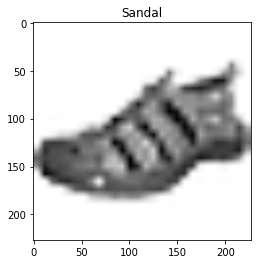

In [13]:
from functions.plot_picture import matplotlib_imshow

# get some random training images
dataiter = iter(train_loader_alex)

images, labels = dataiter.next()

# # creat grid of images
img_grid = torchvision.utils.make_grid(images[0])

# # show images & labels
matplotlib_imshow(img_grid, class_names[labels[0]])

In [14]:
device

device(type='cuda')

### Train model with AlexNet architecture

###AlexNet

![alexnet.png](https://i.loli.net/2020/02/17/xd6oNRpWSK1cZy2.png)

In [15]:
from functions.training import train_model, evaluate_model
from models.alexnet_arch import AlexNet
import torch.optim as optim

losses = []
accuracies = []
EPOCHS = 10
nb_batch = int(np.ceil(len(train_loader_alex.dataset)/batch_size))

alexnet_model = AlexNet()

optimizer = optim.Adam(alexnet_model.parameters(),  lr=0.001)

alexnet_model.to(device)

for epoch in range(EPOCHS):
  losses.extend(train_model(train_loader_alex, device, alexnet_model, optimizer, epoch,  EPOCHS, batch_size)[-nb_batch:])
  accuracies.append(evaluate_model(alexnet_model, device, test_loader_alex, losses[-1], EPOCHS, epoch, batch_size, len(train_loader_alex.dataset)))

 Train Epoch: 1/10 [60000/60000 (100%)]	Loss: 0.393650	 Test Accuracy: 81.7000%
 Train Epoch: 2/10 [60000/60000 (100%)]	Loss: 0.452082	 Test Accuracy: 85.7700%
 Train Epoch: 3/10 [60000/60000 (100%)]	Loss: 0.484635	 Test Accuracy: 86.7600%
 Train Epoch: 4/10 [60000/60000 (100%)]	Loss: 0.408542	 Test Accuracy: 87.2000%
 Train Epoch: 5/10 [60000/60000 (100%)]	Loss: 0.198927	 Test Accuracy: 88.4200%
 Train Epoch: 6/10 [60000/60000 (100%)]	Loss: 0.258141	 Test Accuracy: 88.7300%
 Train Epoch: 7/10 [60000/60000 (100%)]	Loss: 0.419590	 Test Accuracy: 86.4500%
 Train Epoch: 8/10 [60000/60000 (100%)]	Loss: 0.238169	 Test Accuracy: 88.4600%
 Train Epoch: 9/10 [60000/60000 (100%)]	Loss: 0.187756	 Test Accuracy: 89.2300%
 Train Epoch: 10/10 [60000/60000 (100%)]	Loss: 0.378756	 Test Accuracy: 88.6300%


(0.0, 1.0)

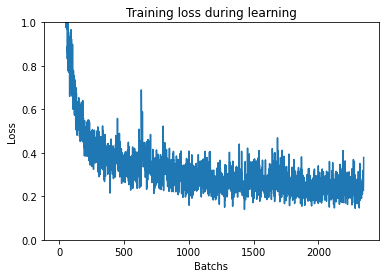

In [16]:
plt.plot(losses)
plt.xlabel("Batchs")
plt.ylabel("Loss")
plt.title("Training loss during learning")
plt.ylim(0,1)

<generator object Module.modules at 0x7f5f4be50938>


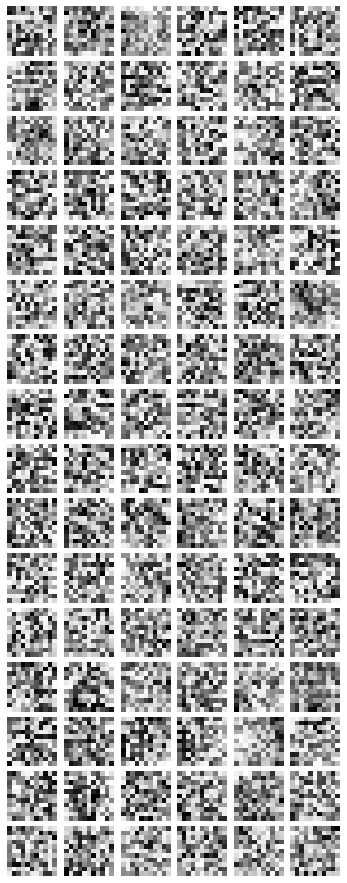

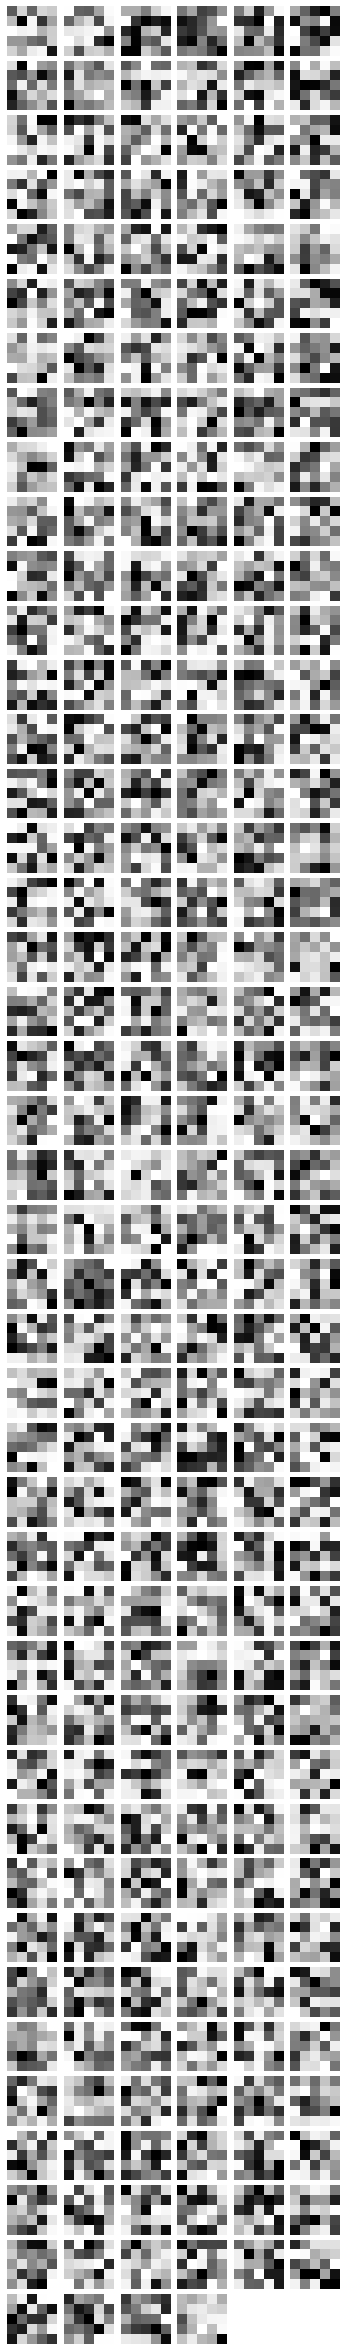

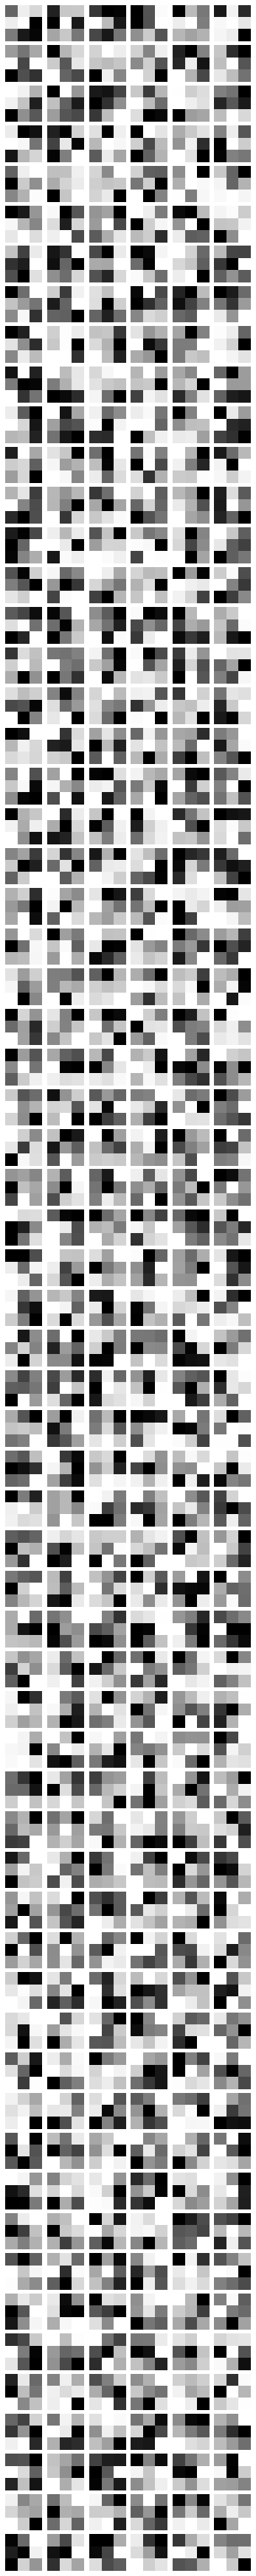

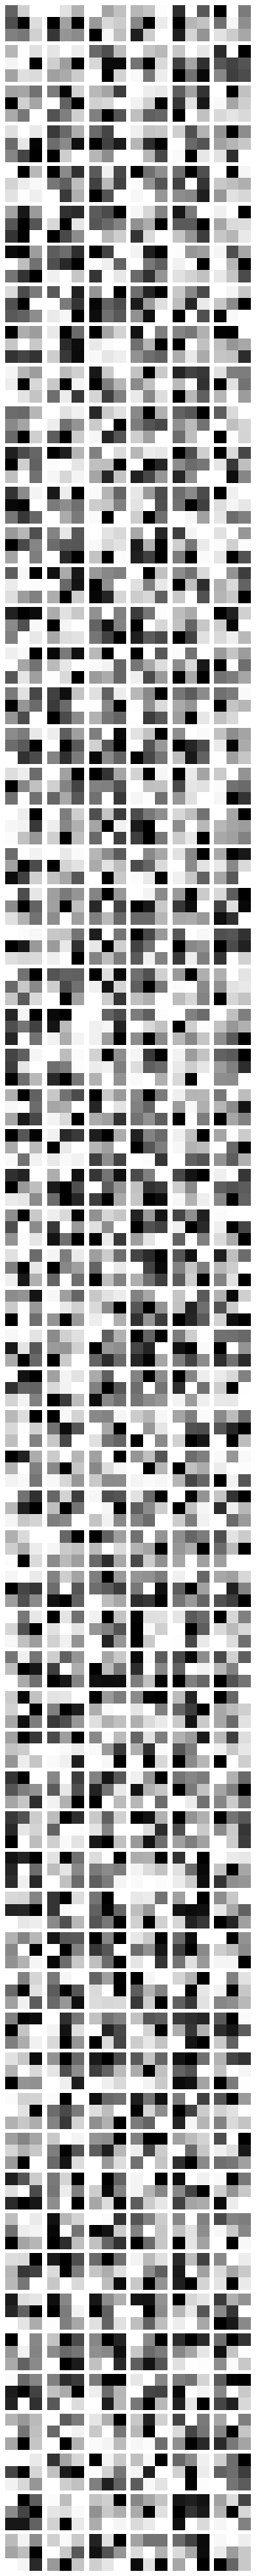

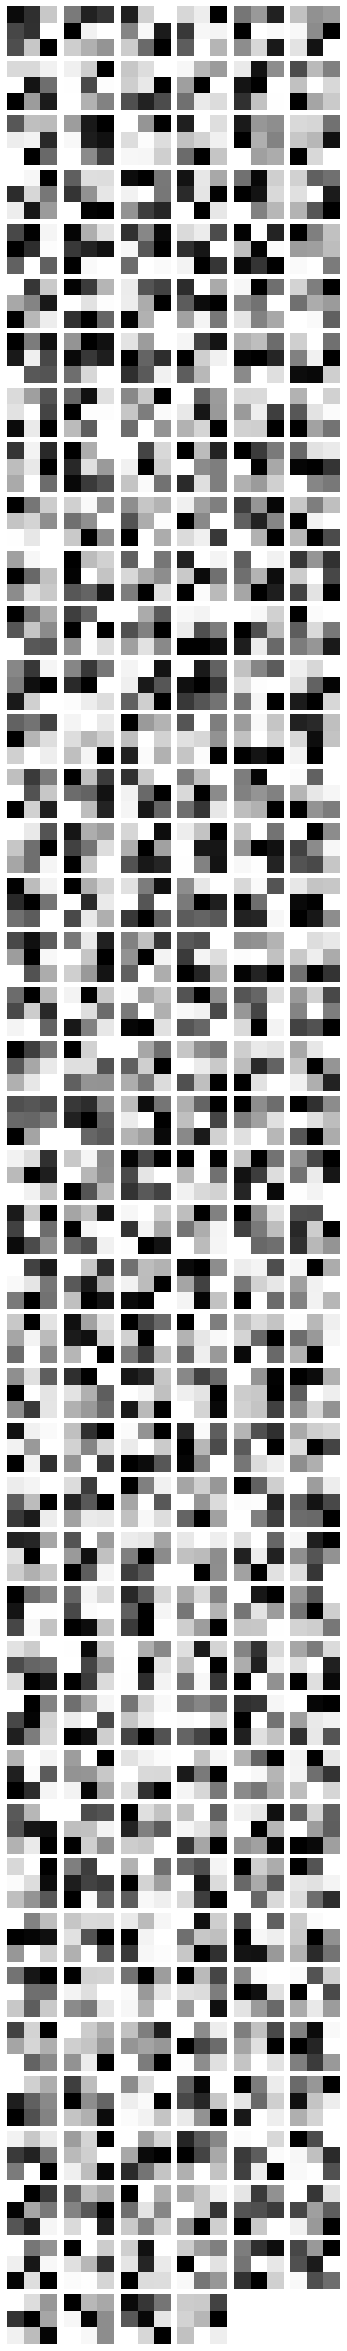

In [17]:
from functions.plot_model import *

model = alexnet_model
print(model.modules())
for m in model.modules():
    if isinstance(m, nn.Conv2d):
        # find the weight tensor for each module...
        plot_kernels(m.weight.data.cpu().numpy()) # .data.cpu().numpy() -> transfer data from gpu to cpu to use kernel

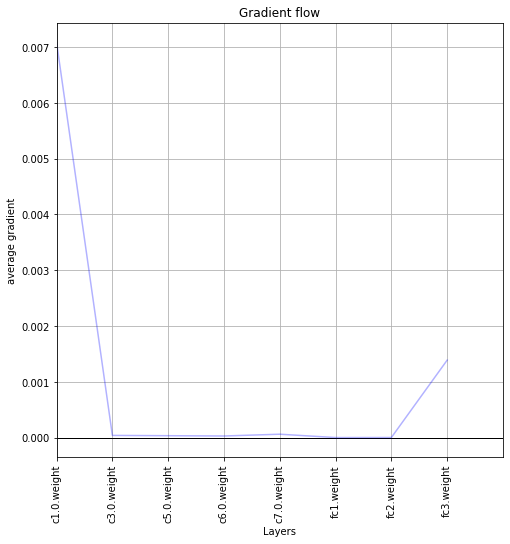

In [18]:
layers = []
for n, p in model.named_parameters():
    if(p.requires_grad) and ("bias" not in n):
        layers.append(n)
fig = plt.figure(figsize=(8,8))
ax = fig.subplots()
plt.xlabel("mini batch")
plt.ylabel("Average Gradient")
plt.title("Gradient Flow")
plt.grid(True)

plot_grad_flow(model.named_parameters())

### Learning rate evolution

In [19]:
accuracies = []
losses = []
learning_rates = [1e-7,1e-6,1e-5,0.0001, 0.0003, 0.001, 0.003, 0.01, 0.03, 0.1]

for lr in learning_rates:
  print("<============== Learning Rate : "+ str(lr) +"==============>")
  optimizer = optim.Adam(alexnet_model.parameters(),  lr=lr)
  for epoch in range(EPOCHS):
    losses.extend(train_model(train_loader_alex, device, alexnet_model, optimizer, epoch,  EPOCHS, batch_size)[-nb_batch:])
    accuracies.append(evaluate_model(alexnet_model, device, test_loader_alex, losses[-1], EPOCHS, epoch, batch_size, len(train_loader_alex.dataset)))

<============== Learning Rate : 1e-07==============>
 Train Epoch: 1/10 [60000/60000 (100%)]	Loss: 0.271919	 Test Accuracy: 88.5000%
 Train Epoch: 2/10 [60000/60000 (100%)]	Loss: 0.278714	 Test Accuracy: 88.6600%
 Train Epoch: 3/10 [60000/60000 (100%)]	Loss: 0.229905	 Test Accuracy: 88.6700%
 Train Epoch: 4/10 [60000/60000 (100%)]	Loss: 0.216420	 Test Accuracy: 88.6700%
 Train Epoch: 5/10 [60000/60000 (100%)]	Loss: 0.294984	 Test Accuracy: 88.9600%
 Train Epoch: 6/10 [60000/60000 (100%)]	Loss: 0.159249	 Test Accuracy: 88.8600%
 Train Epoch: 7/10 [60000/60000 (100%)]	Loss: 0.252796	 Test Accuracy: 89.0200%
 Train Epoch: 8/10 [60000/60000 (100%)]	Loss: 0.174033	 Test Accuracy: 89.2900%
 Train Epoch: 9/10 [60000/60000 (100%)]	Loss: 0.335638	 Test Accuracy: 89.0800%
 Train Epoch: 10/10 [60000/60000 (100%)]	Loss: 0.238434	 Test Accuracy: 89.1700%
<============== Learning Rate : 1e-06==============>
 Train Epoch: 1/10 [60000/60000 (100%)]	Loss: 0.175296	 Test Accuracy: 89.5500%
 Train Epoch:

Text(0.5, 1.0, 'Accuracy in function of learning rate')

<Figure size 432x288 with 0 Axes>

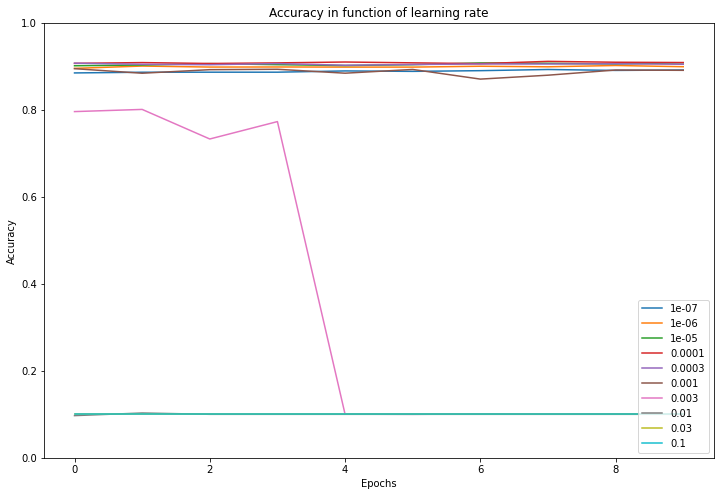

In [48]:
fig = plt.figure()
x = np.arange(10)

cnt = 0
fig = plt.figure(figsize=(12, 8))
for lr in learning_rates:
  plt.plot(x, accuracies[cnt*10:(cnt+1)*10], label=str(lr))
  cnt+=1

plt.legend(loc='lower right')
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.ylim(0,1)
plt.title("Accuracy in function of learning rate")

In [22]:
def filter_losses(losses, EPOCHS):
  losses_filtered = []
  for i in range(EPOCHS):
    if i==0:
      losses_filtered.append(losses[nb_batch-1])
    else:
      losses_filtered.append(losses[nb_batch-1+nb_batch*i])
  return losses_filtered

Text(0.5, 1.0, 'Accuracy in function of learning rate')

<Figure size 432x288 with 0 Axes>

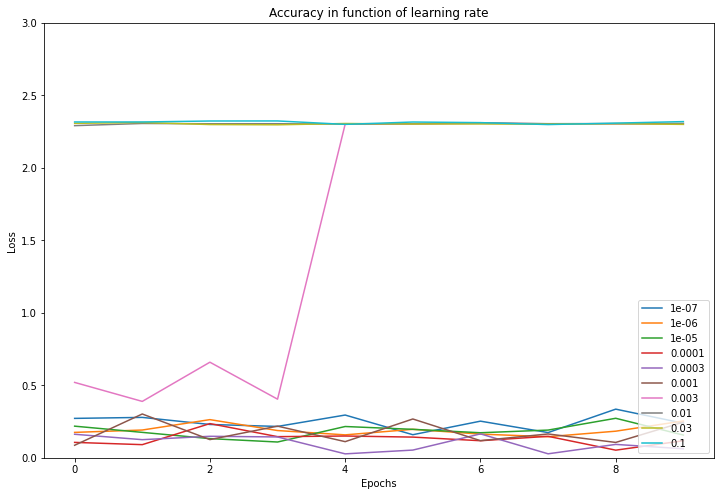

In [30]:
fig = plt.figure()
x = np.arange(10)

cnt = 0
fig = plt.figure(figsize=(12, 8))
for lr in learning_rates:
  plt.plot(x, filter_losses(losses, len(learning_rates*EPOCHS))[cnt*10:(cnt+1)*10], label=str(lr))
  cnt+=1

plt.legend(loc='lower right')
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.ylim(0,3)
plt.title("Accuracy in function of learning rate")

In [44]:
import pandas as pd
rows = []

for cnt in range(len(learning_rates)):
     rows.append(filter_losses(losses, len(learning_rates*EPOCHS))[cnt*10:(cnt+1)*10])

df_losses = pd.DataFrame(np.array(rows).T, columns=learning_rates)
df_losses.head()

,1.000000e-07,1.000000e-06,1.000000e-05,1.000000e-04,3.000000e-04,1.000000e-03,3.000000e-03,1.000000e-02,3.000000e-02,1.000000e-01
0,0.271919,0.175296,0.218262,0.106310,0.162353,0.086530,0.520068,2.291311,2.307132,2.316680
1,0.278714,0.191605,0.175427,0.090699,0.125071,0.302228,0.389065,2.306353,2.313049,2.316661
2,0.229905,0.263355,0.132342,0.235900,0.148378,0.125552,0.659519,2.304383,2.298952,2.323335
3,0.216420,0.188031,0.108917,0.145842,0.143829,0.218494,0.404467,2.304587,2.297271,2.323744
4,0.294984,0.158223,0.215879,0.150289,0.027188,0.111387,2.301912,2.302196,2.306165,2.300124


In [51]:
df_losses.to_csv('csv/losses_lr.csv')

In [49]:
rows_acc = []

for cnt in range(len(learning_rates)):
     rows_acc.append(accuracies[cnt*10:(cnt+1)*10])

df_accuracies = pd.DataFrame(np.array(rows_acc).T, columns=learning_rates)
df_accuracies.head()

,1.000000e-07,1.000000e-06,1.000000e-05,1.000000e-04,3.000000e-04,1.000000e-03,3.000000e-03,1.000000e-02,3.000000e-02,1.000000e-01
0,0.8850,0.8955,0.9015,0.9070,0.9074,0.8948,0.7961,0.097,0.1,0.1
1,0.8866,0.9008,0.9032,0.9088,0.9049,0.8843,0.8011,0.103,0.1,0.1
2,0.8867,0.8985,0.9064,0.9067,0.9039,0.8925,0.7331,0.100,0.1,0.1
3,0.8867,0.8987,0.9040,0.9081,0.9065,0.8934,0.7731,0.100,0.1,0.1
4,0.8896,0.8984,0.9020,0.9101,0.9027,0.8844,0.1003,0.100,0.1,0.1


In [52]:
df_accuracies.to_csv('csv/accuracies_lr.csv')